In [ ]:
import os
import pandas as pd
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
from IPython.display import SVG
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import optimizers
#from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.utils import to_categorical, model_to_dot, plot_model
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau

In [ ]:
dirpath1='/content/drive/MyDrive/20222電機系電腦視覺/final_project/train/'
n=len(os.listdir(dirpath1))
print("There are {} directory in this directory!".format(n))
m=os.listdir(dirpath1)
dic={}
for x in m:
  y=len(os.listdir(f"/content/drive/MyDrive/20222電機系電腦視覺/final_project/train/{x}"))
  dic[x]=y
print(dic)

There are 50 directory in this directory!
{'三杯雞': 535, '什錦炒麵': 628, '咖哩雞': 609, '塔香海茸': 548, '大陸妹': 573, '客家小炒': 611, '小番茄': 681, '有機小松菜': 513, '有機青松菜': 396, '木瓜': 648, '柳丁': 572, '棗子': 690, '橘子': 617, '沙茶肉片': 511, '油菜': 586, '洋蔥炒蛋': 492, '滷蛋': 616, '滷雞腿': 672, '玉米炒蛋': 549, '瓜仔肉': 643, '番茄炒蛋': 502, '白米飯': 503, '白菜滷': 476, '福山萵苣': 104, '空心菜': 656, '糖醋雞丁': 606, '紅蘿蔔炒蛋': 620, '義大利麵': 659, '芥藍菜': 333, '菠菜': 608, '葡萄': 559, '蒜泥白肉': 518, '蒸蛋': 507, '蓮霧': 436, '螞蟻上樹': 496, '西瓜': 640, '豆芽菜': 655, '關東煮': 542, '青江菜': 479, '香蕉': 640, '香酥魚排': 672, '馬鈴薯燉肉': 553, '高麗菜': 484, '鳳梨': 578, '鵝白菜': 563, '鹽酥雞': 603, '麥克雞塊': 524, '麻婆豆腐': 569, '麻油雞': 613, '黑胡椒豬柳': 547}


In [ ]:
dirpath2='/content/drive/MyDrive/20222電機系電腦視覺/final_project/test/'
n=len(os.listdir(dirpath2))
print("There are {} directory in this directory!".format(n))
m=os.listdir(dirpath2)
dic={}
for x in m:
  y=len(os.listdir(f"/content/drive/MyDrive/20222電機系電腦視覺/final_project/test/{x}"))
  dic[x]=y
print(dic)

There are 50 directory in this directory!
{'三杯雞': 134, '什錦炒麵': 158, '咖哩雞': 153, '塔香海茸': 137, '大陸妹': 144, '客家小炒': 153, '小番茄': 171, '有機小松菜': 129, '有機青松菜': 99, '木瓜': 162, '柳丁': 143, '棗子': 173, '橘子': 155, '沙茶肉片': 128, '油菜': 147, '洋蔥炒蛋': 124, '滷蛋': 155, '滷雞腿': 169, '玉米炒蛋': 138, '瓜仔肉': 161, '番茄炒蛋': 126, '白米飯': 126, '白菜滷': 119, '福山萵苣': 26, '空心菜': 164, '糖醋雞丁': 152, '紅蘿蔔炒蛋': 156, '義大利麵': 165, '芥藍菜': 84, '菠菜': 153, '葡萄': 140, '蒜泥白肉': 130, '蒸蛋': 127, '蓮霧': 109, '螞蟻上樹': 124, '西瓜': 161, '豆芽菜': 164, '關東煮': 136, '青江菜': 120, '香蕉': 160, '香酥魚排': 168, '馬鈴薯燉肉': 139, '高麗菜': 122, '鳳梨': 145, '鵝白菜': 141, '鹽酥雞': 151, '麥克雞塊': 131, '麻婆豆腐': 143, '麻油雞': 154, '黑胡椒豬柳': 137}


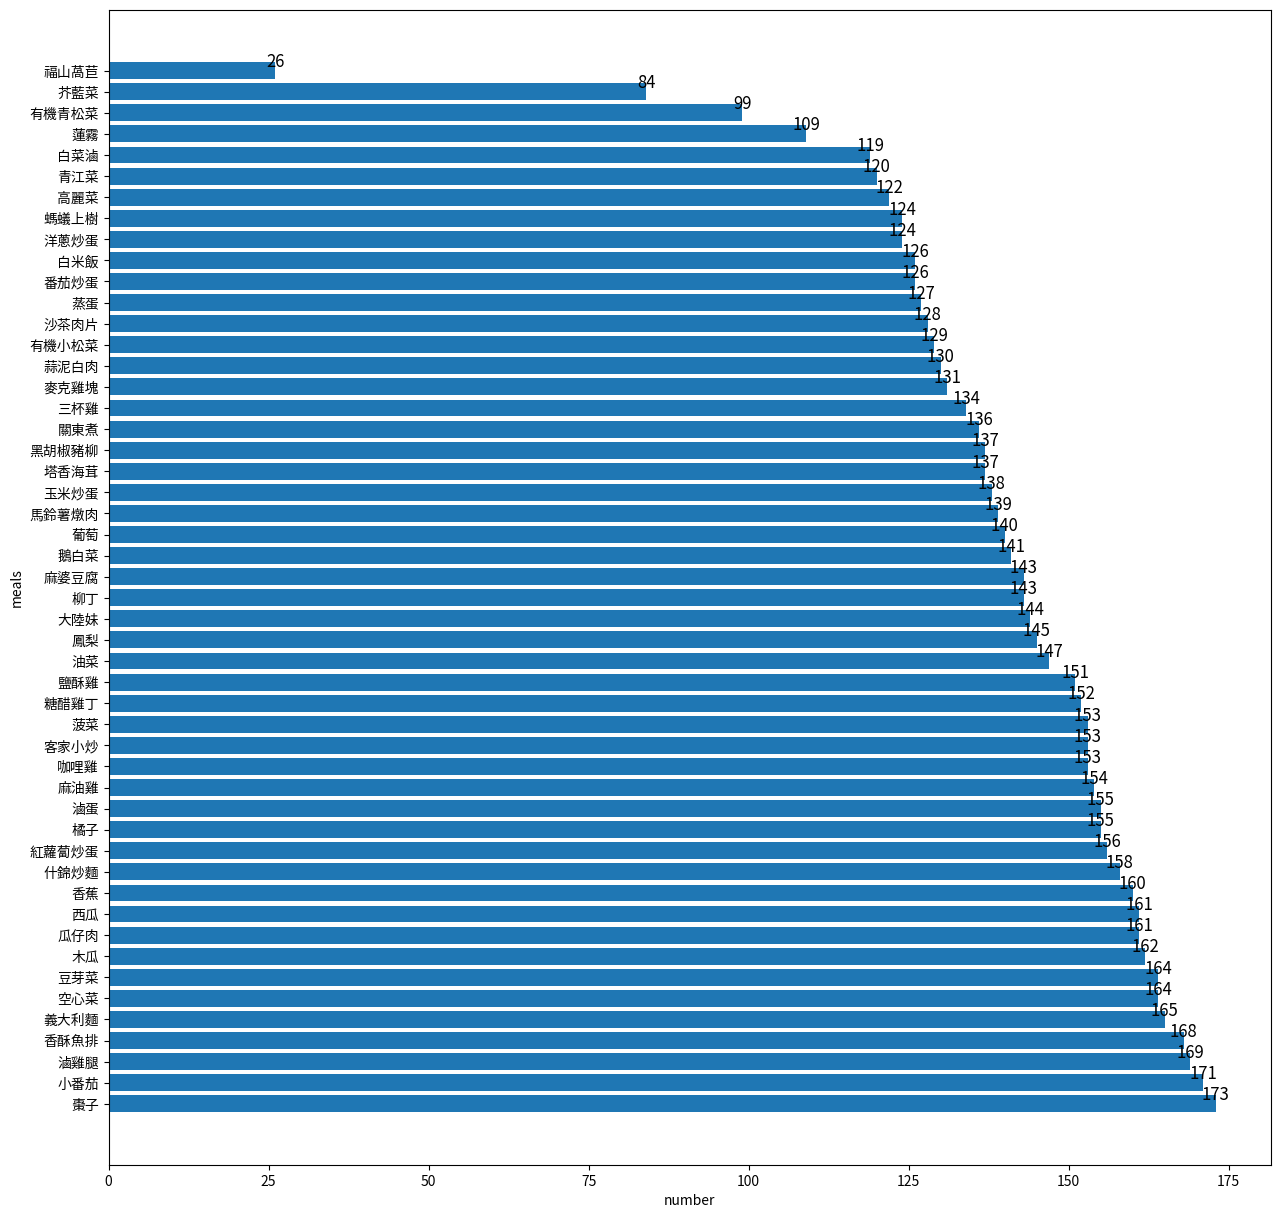

In [ ]:
def draw_from_dict(dicdata):
  by_value=sorted(dicdata.items(),key=lambda item:item[1],reverse=True)
  x=[]
  y=[]
  for d in by_value:
    x.append(d[0])
    y.append(d[1])
  fig=plt.figure(1, figsize=(15, 15))
  plt.barh(x,y)
  for a,b in zip(y,x):
    plt.text(a,b,a,ha='center',va='bottom',fontsize=12)
  plt.xlabel('number')
  plt.ylabel('meals')
  plt.savefig('/content/drive/MyDrive/plt.png')
  plt.show()

  return

draw_from_dict(dic)

##資料處理/資料增強

In [ ]:
imgSize=(224,224)
imgShape=(224,224,3)
#imgSize=(299,299)
#imgShape=(299,299,3)
batchSize=64

# train generator
trainDataGenerator = ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    vertical_flip= True,
    rotation_range= 20,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    validation_split=0.2,
    fill_mode="nearest",
    #vgg19
    #preprocessing_function=preprocess_input
    )
valDataGenerator = ImageDataGenerator(rescale=1/255,validation_split=0.2)

trainBatch = trainDataGenerator.flow_from_directory(
    directory = dirpath+'train',
    target_size = imgSize,
    color_mode= 'rgb',
    batch_size= batchSize,
    class_mode= 'categorical',
    subset='training',
    shuffle= True,
    seed= 1337
)

valBatch = valDataGenerator.flow_from_directory(
    directory = dirpath+'train',
    target_size = imgSize,
    color_mode= 'rgb',
    batch_size= batchSize,
    class_mode= 'categorical',
    subset='validation',
    shuffle= True,
    seed= 1337
)





Found 22343 images belonging to 50 classes.
Found 5560 images belonging to 50 classes.


In [ ]:
# test generator
testDataGenerator = ImageDataGenerator(rescale=1/255)


testBatch = testDataGenerator.flow_from_directory(
    directory = dirpath+'test',
    class_mode='categorical',
    color_mode= 'rgb',
    batch_size=batchSize,
    target_size= imgSize,
    shuffle = False
)

Found 7002 images belonging to 50 classes.


## 載入模型

##inceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

#nb_train_samples = 3583
#nb_validation_samples = 1089

inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(50,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy',TopKCategoricalAccuracy(k=5,name='top_5_categorical_accuracy',dtype=None)])
checkpointer = ModelCheckpoint(filepath='v1_inceptionV3', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_v1_inceptionV3.log')


87910968/87910968 [==============================] - 6s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

##inceptionV4

In [ ]:
import numpy as np

# Sys
import warnings
# Keras Core
from tensorflow.keras.layers import MaxPooling2D, Convolution2D, AveragePooling2D
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import concatenate
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
# Backend
from tensorflow.keras import backend as K
# Utils
#from tensorflow.python.keras.utils import convert_all_kernels_in_model
from tensorflow.keras.utils import get_file
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import TopKCategoricalAccuracy


#########################################################################################
# Implements the Inception Network v4 (http://arxiv.org/pdf/1602.07261v1.pdf) in Keras. #
#########################################################################################

WEIGHTS_PATH = 'https://github.com/kentsommer/keras-inceptionV4/releases/download/2.1/inception-v4_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/kentsommer/keras-inceptionV4/releases/download/2.1/inception-v4_weights_tf_dim_ordering_tf_kernels_notop.h5'


def preprocess_input(x):
    x = np.divide(x, 255.0)
    x = np.subtract(x, 0.5)
    x = np.multiply(x, 2.0)
    return x


def conv2d_bn(x, nb_filter, num_row, num_col,
              padding='same', strides=(1, 1), use_bias=False):
    """
    Utility function to apply conv + BN.
    (Slightly modified from https://github.com/fchollet/keras/blob/master/keras/applications/inception_v3.py)
    """
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1
    x = Convolution2D(nb_filter, (num_row, num_col),
                      strides=strides,
                      padding=padding,
                      use_bias=use_bias,
                      kernel_regularizer=regularizers.l2(0.00004),
                      kernel_initializer=initializers.VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None))(x)
    x = BatchNormalization(axis=channel_axis, momentum=0.9997, scale=False)(x)
    x = Activation('relu')(x)
    return x


def block_inception_a(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 96, 1, 1)

    branch_1 = conv2d_bn(input, 64, 1, 1)
    branch_1 = conv2d_bn(branch_1, 96, 3, 3)

    branch_2 = conv2d_bn(input, 64, 1, 1)
    branch_2 = conv2d_bn(branch_2, 96, 3, 3)
    branch_2 = conv2d_bn(branch_2, 96, 3, 3)

    branch_3 = AveragePooling2D((3,3), strides=(1,1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 96, 1, 1)

    x = concatenate([branch_0, branch_1, branch_2, branch_3], axis=channel_axis)
    return x


def block_reduction_a(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 384, 3, 3, strides=(2,2), padding='valid')

    branch_1 = conv2d_bn(input, 192, 1, 1)
    branch_1 = conv2d_bn(branch_1, 224, 3, 3)
    branch_1 = conv2d_bn(branch_1, 256, 3, 3, strides=(2,2), padding='valid')

    branch_2 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(input)

    x = concatenate([branch_0, branch_1, branch_2], axis=channel_axis)
    return x


def block_inception_b(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 384, 1, 1)

    branch_1 = conv2d_bn(input, 192, 1, 1)
    branch_1 = conv2d_bn(branch_1, 224, 1, 7)
    branch_1 = conv2d_bn(branch_1, 256, 7, 1)

    branch_2 = conv2d_bn(input, 192, 1, 1)
    branch_2 = conv2d_bn(branch_2, 192, 7, 1)
    branch_2 = conv2d_bn(branch_2, 224, 1, 7)
    branch_2 = conv2d_bn(branch_2, 224, 7, 1)
    branch_2 = conv2d_bn(branch_2, 256, 1, 7)

    branch_3 = AveragePooling2D((3,3), strides=(1,1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 128, 1, 1)

    x = concatenate([branch_0, branch_1, branch_2, branch_3], axis=channel_axis)
    return x


def block_reduction_b(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 192, 1, 1)
    branch_0 = conv2d_bn(branch_0, 192, 3, 3, strides=(2, 2), padding='valid')

    branch_1 = conv2d_bn(input, 256, 1, 1)
    branch_1 = conv2d_bn(branch_1, 256, 1, 7)
    branch_1 = conv2d_bn(branch_1, 320, 7, 1)
    branch_1 = conv2d_bn(branch_1, 320, 3, 3, strides=(2,2), padding='valid')

    branch_2 = MaxPooling2D((3, 3), strides=(2, 2), padding='valid')(input)

    x = concatenate([branch_0, branch_1, branch_2], axis=channel_axis)
    return x


def block_inception_c(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 256, 1, 1)

    branch_1 = conv2d_bn(input, 384, 1, 1)
    branch_10 = conv2d_bn(branch_1, 256, 1, 3)
    branch_11 = conv2d_bn(branch_1, 256, 3, 1)
    branch_1 = concatenate([branch_10, branch_11], axis=channel_axis)


    branch_2 = conv2d_bn(input, 384, 1, 1)
    branch_2 = conv2d_bn(branch_2, 448, 3, 1)
    branch_2 = conv2d_bn(branch_2, 512, 1, 3)
    branch_20 = conv2d_bn(branch_2, 256, 1, 3)
    branch_21 = conv2d_bn(branch_2, 256, 3, 1)
    branch_2 = concatenate([branch_20, branch_21], axis=channel_axis)

    branch_3 = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 256, 1, 1)

    x = concatenate([branch_0, branch_1, branch_2, branch_3], axis=channel_axis)
    return x


def inception_v4_base(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    # Input Shape is 299 x 299 x 3 (th) or 3 x 299 x 299 (th)
    net = conv2d_bn(input, 32, 3, 3, strides=(2,2), padding='valid')
    net = conv2d_bn(net, 32, 3, 3, padding='valid')
    net = conv2d_bn(net, 64, 3, 3)

    branch_0 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(net)

    branch_1 = conv2d_bn(net, 96, 3, 3, strides=(2,2), padding='valid')

    net = concatenate([branch_0, branch_1], axis=channel_axis)

    branch_0 = conv2d_bn(net, 64, 1, 1)
    branch_0 = conv2d_bn(branch_0, 96, 3, 3, padding='valid')

    branch_1 = conv2d_bn(net, 64, 1, 1)
    branch_1 = conv2d_bn(branch_1, 64, 1, 7)
    branch_1 = conv2d_bn(branch_1, 64, 7, 1)
    branch_1 = conv2d_bn(branch_1, 96, 3, 3, padding='valid')

    net = concatenate([branch_0, branch_1], axis=channel_axis)

    branch_0 = conv2d_bn(net, 192, 3, 3, strides=(2,2), padding='valid')
    branch_1 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(net)

    net = concatenate([branch_0, branch_1], axis=channel_axis)

    # 35 x 35 x 384
    # 4 x Inception-A blocks
    for idx in range(4):
      net = block_inception_a(net)

    # 35 x 35 x 384
    # Reduction-A block
    net = block_reduction_a(net)

    # 17 x 17 x 1024
    # 7 x Inception-B blocks
    for idx in range(7):
      net = block_inception_b(net)

    # 17 x 17 x 1024
    # Reduction-B block
    net = block_reduction_b(net)

    # 8 x 8 x 1536
    # 3 x Inception-C blocks
    for idx in range(3):
      net = block_inception_c(net)

    return net


def inception_v4(num_classes, dropout_keep_prob, weights, include_top):
    '''
    Creates the inception v4 network
    Args:
    	num_classes: number of classes
    	dropout_keep_prob: float, the fraction to keep before final layer.

    Returns:
    	logits: the logits outputs of the model.
    '''

    # Input Shape is 299 x 299 x 3 (tf) or 3 x 299 x 299 (th)
    if K.image_data_format() == 'channels_first':
        inputs = Input((3, 299, 299))
    else:
        inputs = Input((299, 299, 3))

    # Make inception base
    x = inception_v4_base(inputs)


    # Final pooling and prediction
    if include_top:
        # 1 x 1 x 1536
        x = AveragePooling2D((8,8), padding='valid')(x)
        x = Dropout(dropout_keep_prob)(x)
        x = Flatten()(x)
        # 1536
        x = Dense(units=num_classes, activation='softmax')(x)

    model = Model(inputs, x, name='inception_v4')

    # load weights
    if weights == 'imagenet':
        if K.image_data_format() == 'channels_first':
            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
        if include_top:
            weights_path = get_file(
                'inception-v4_weights_tf_dim_ordering_tf_kernels.h5',
                WEIGHTS_PATH,
                cache_subdir='models',
                md5_hash='9fe79d77f793fe874470d84ca6ba4a3b')
        else:
            weights_path = get_file(
                'inception-v4_weights_tf_dim_ordering_tf_kernels_notop.h5',
                WEIGHTS_PATH_NO_TOP,
                cache_subdir='models',
                md5_hash='9296b46b5971573064d12e4669110969')
        model.load_weights(weights_path, by_name=True)
    return model


def create_model(num_classes=50, dropout_prob=0.2, weights=None, include_top=True):
    return inception_v4(num_classes, dropout_prob, weights, include_top)

In [ ]:
from tensorflow.keras import layers
base_model = create_model(num_classes=50,weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
#x = Dense(128,activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
#x = Dropout(0.2)(x)
x = Dense(50,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
"""
for layer in model.layers[:3]:
    layer.trainable = False
for layer in model.layers[3:]:
    layer.trainable = True
"""
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',TopKCategoricalAccuracy(k=5,name='top_5_categorical_accuracy',dtype=None)])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_243 (Conv2D)            (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_243 (Batch  (None, 149, 149, 32  96         ['conv2d_243[0][0]']             
 Normalization)                 )                                                           

##VGG16

In [ ]:
"""
import itertools
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
"""
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False)
# 連接自訂層
x = base_model.output
#x = layers.Flatten()(x)
x = layers.GlobalAveragePooling2D()(x)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(50, activation='sigmoid')(x)

# 設定新模型的 inputs/outputs
model = Model(inputs=base_model.input, outputs=x)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy',TopKCategoricalAccuracy(k=5,name='top_5_categorical_accuracy',dtype=None)])



58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

##VGG19

In [ ]:

import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.layers import LeakyReLU
"""
base_model = VGG19(weights='imagenet', include_top=False,input_shape=(224,224,3))
model=Sequential()
for layer in base_model.layers[:-1]:
  model.add(layer)
#model.layers.pop()

for layer in model.layers:
    layer.trainable = False
"""


base_model = VGG19(weights='imagenet', include_top=False,input_shape=(224,224,3))
# 連接自訂層
x = base_model.output

#x = layers.Flatten()(x)
x = layers.GlobalAveragePooling2D()(x)
#x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(50, activation='softmax')(x)


# 設定新模型的 inputs/outputs
model = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy',TopKCategoricalAccuracy(k=5,name='top_5_categorical_accuracy',dtype=None)])

80134624/80134624 [==============================] - 6s 0us/step


In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

## ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications. import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False,input_shape=(224,224,3))
# 連接自訂層
x = base_model.output

x = layers.Flatten()(x)
#x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
#x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dropout(0.2)(x)
#x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(50, activation='softmax')(x)


# 設定新模型的 inputs/outputs
model = Model(inputs=base_model.input, outputs=x)

for layer in model.layers[:2]:
    layer.trainable = False
for layer in model.layers[2:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy',TopKCategoricalAccuracy(k=5,name='top_5_categorical_accuracy',dtype=None)])

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

##ResNet101

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications. import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

base_model = ResNet101(weights='imagenet', include_top=False,input_shape=(224,224,3))
# 連接自訂層
x = base_model.output

x = layers.Flatten()(x)
#x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
#x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dropout(0.2)(x)
#x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(50, activation='softmax')(x)


# 設定新模型的 inputs/outputs
model = Model(inputs=base_model.input, outputs=x)

for layer in model.layers[:2]:
    layer.trainable = False
for layer in model.layers[2:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy',TopKCategoricalAccuracy(k=5,name='top_5_categorical_accuracy',dtype=None)])

171446536/171446536 [==============================] - 8s 0us/step


In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

##EfficientNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

base_model =EfficientNetB7(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=50,
    classifier_activation='softmax')

model = Model(inputs=base_model.input, outputs=base_model.output)

for layer in model.layers[:100]:
    layer.trainable = False
for layer in model.layers[100:]:
    layer.trainable = True



model.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy',TopKCategoricalAccuracy(k=5,name='top_5_categorical_accuracy',dtype=None)])

In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 600, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 600, 600, 3)  0           ['input_8[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 600, 600, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 601, 601, 3)  0           ['normalization[0][0]']    

##設定

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 設定earlystop條件
estop = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# 設定模型儲存條件
checkpoint = ModelCheckpoint('/content/drive/MyDrive/ResNet101_checkpoint_v2.h5', verbose=1,
                          monitor='val_accuracy', save_best_only=True,
                          mode='min')

## train model

<ipython-input-9-5d8f90a511cb>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(


Epoch 1/15
 72/350 [=====>........................] - ETA: 7:50 - loss: 4.5199 - accuracy: 0.2355 - top_5_categorical_accuracy: 0.5030

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


350/350 [==============================] - ETA: 0s - loss: 2.2601 - accuracy: 0.4765 - top_5_categorical_accuracy: 0.7944
Epoch 1: val_loss improved from inf to 10.34515, saving model to /content/drive/MyDrive/ResNet101_checkpoint_v2.h5
350/350 [==============================] - 762s 2s/step - loss: 2.2601 - accuracy: 0.4765 - top_5_categorical_accuracy: 0.7944 - val_loss: 10.3452 - val_accuracy: 0.0201 - val_top_5_categorical_accuracy: 0.1207
Epoch 2/15
350/350 [==============================] - ETA: 0s - loss: 1.1150 - accuracy: 0.6633 - top_5_categorical_accuracy: 0.9395
Epoch 2: val_loss improved from 10.34515 to 8.30019, saving model to /content/drive/MyDrive/ResNet101_checkpoint_v2.h5
350/350 [==============================] - 688s 2s/step - loss: 1.1150 - accuracy: 0.6633 - top_5_categorical_accuracy: 0.9395 - val_loss: 8.3002 - val_accuracy: 0.0754 - val_top_5_categorical_accuracy: 0.3329
Epoch 3/15
350/350 [==============================] - ETA: 0s - loss: 0.9232 - accuracy: 0

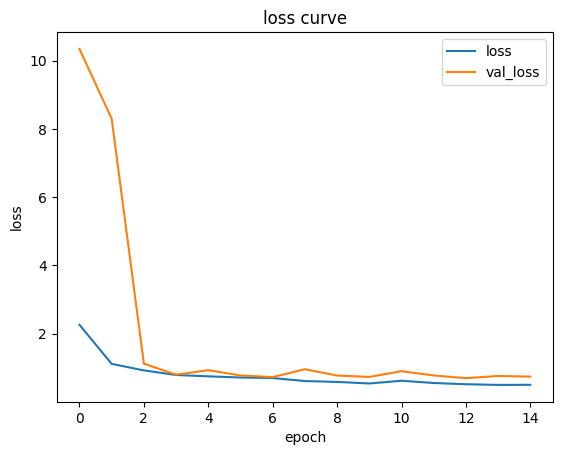

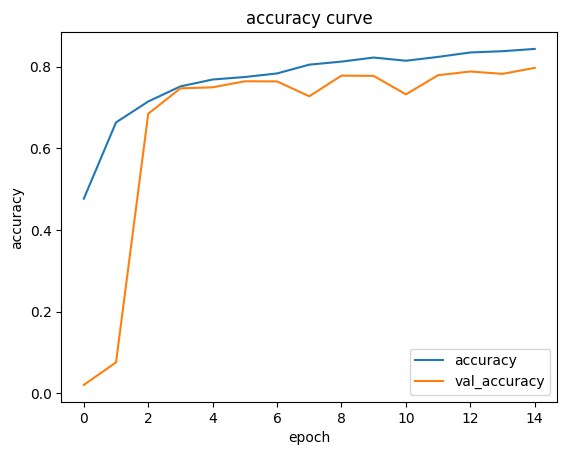

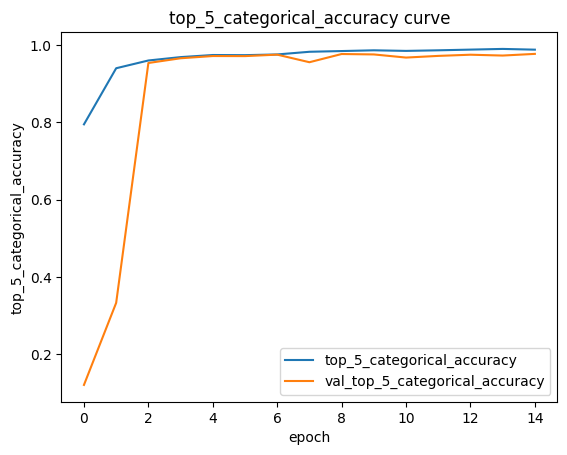

In [ ]:
import math
history= model.fit_generator(
    trainBatch,
    epochs = 15,
    steps_per_epoch = math.ceil(trainBatch.samples / batchSize),
    validation_data = valBatch,
    validation_steps = math.ceil(valBatch.samples / batchSize),
    verbose = 1,
    #shuffle = True
    callbacks=[checkpoint, estop]
)



model.save('/content/drive/MyDrive/model_v2_ResNet101.h5')

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.plot(history.history['top_5_categorical_accuracy'],label='top_5_categorical_accuracy')
plt.plot(history.history['val_top_5_categorical_accuracy'],label='val_top_5_categorical_accuracy')
plt.title('top_5_categorical_accuracy curve')
plt.xlabel('epoch')
plt.ylabel('top_5_categorical_accuracy')
plt.legend()
plt.show()

## show the loss & accuracy curve

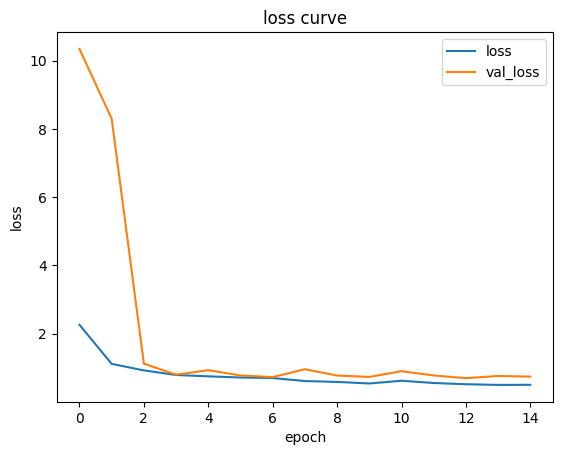

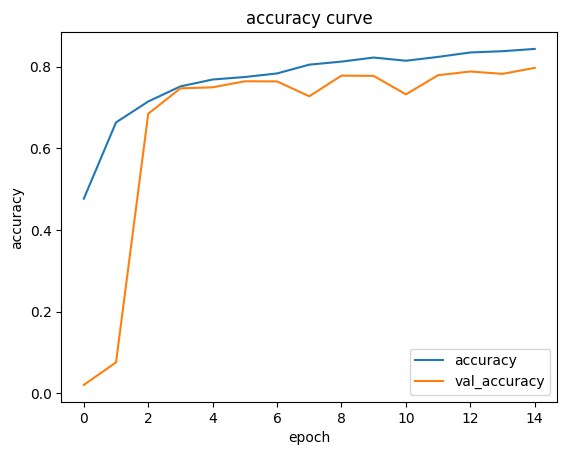

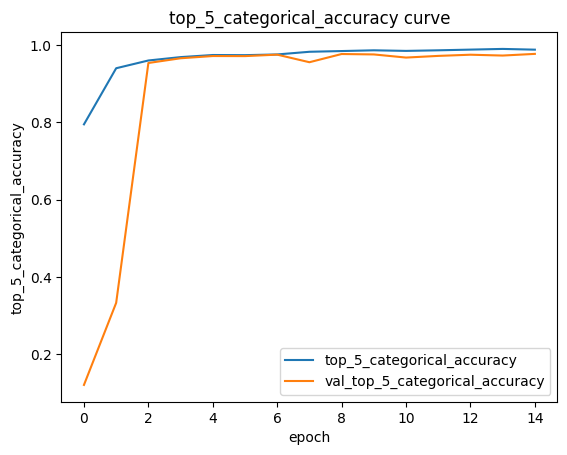

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.plot(history.history['top_5_categorical_accuracy'],label='top_5_categorical_accuracy')
plt.plot(history.history['val_top_5_categorical_accuracy'],label='val_top_5_categorical_accuracy')
plt.title('top_5_categorical_accuracy curve')
plt.xlabel('epoch')
plt.ylabel('top_5_categorical_accuracy')
plt.legend()
plt.show()

##載入/輸出模型

In [ ]:
model.save('/content/drive/MyDrive/model_v1_vgg16.h5')

In [ ]:
from keras.models import load_model
import tensorflow.keras.backend as K
K.clear_session()
path_to_model='/content/drive/MyDrive/model_v2_inceptionV3.h5'
print("Loading the model..")
model1 = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


## predict test data

In [ ]:
scores = model1.evaluate_generator(testBatch)

print("Test Accuracy: {:.3f}".format(scores[1]))
print("Test top-5 Accuracy: {:.3f}".format(scores[2]))

<ipython-input-59-5faaafe3b723>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model1.evaluate_generator(testBatch)


Test Accuracy: 0.663
Test top-5 Accuracy: 0.924


## Function to predict single image or predict all images from a directory

In [ ]:
class_map = testBatch.class_indices
class_map

{'三杯雞': 0,
 '什錦炒麵': 1,
 '咖哩雞': 2,
 '塔香海茸': 3,
 '大陸妹': 4,
 '客家小炒': 5,
 '小番茄': 6,
 '有機小松菜': 7,
 '有機青松菜': 8,
 '木瓜': 9,
 '柳丁': 10,
 '棗子': 11,
 '橘子': 12,
 '沙茶肉片': 13,
 '油菜': 14,
 '洋蔥炒蛋': 15,
 '滷蛋': 16,
 '滷雞腿': 17,
 '玉米炒蛋': 18,
 '瓜仔肉': 19,
 '番茄炒蛋': 20,
 '白米飯': 21,
 '白菜滷': 22,
 '福山萵苣': 23,
 '空心菜': 24,
 '糖醋雞丁': 25,
 '紅蘿蔔炒蛋': 26,
 '義大利麵': 27,
 '芥藍菜': 28,
 '菠菜': 29,
 '葡萄': 30,
 '蒜泥白肉': 31,
 '蒸蛋': 32,
 '蓮霧': 33,
 '螞蟻上樹': 34,
 '西瓜': 35,
 '豆芽菜': 36,
 '關東煮': 37,
 '青江菜': 38,
 '香蕉': 39,
 '香酥魚排': 40,
 '馬鈴薯燉肉': 41,
 '高麗菜': 42,
 '鳳梨': 43,
 '鵝白菜': 44,
 '鹽酥雞': 45,
 '麥克雞塊': 46,
 '麻婆豆腐': 47,
 '麻油雞': 48,
 '黑胡椒豬柳': 49}

In [ ]:
from tensorflow.keras.preprocessing import image

category={
    0: ['三杯雞'], 1: ['什錦炒麵'], 2: ['咖哩雞'],
    3: ['塔香海茸'], 4: ['大陸妹'], 5: ['客家小炒'],
    6: ['小番茄'], 7: ['有機小松菜'], 8: ['有機青松菜'], 9: ['木瓜'],
    10: ['柳丁'], 11: ['棗子'], 12: ['橘子'],
    13: ['沙茶肉片'], 14: ['油菜'], 15: ['洋蔥炒蛋'],
    16: ['滷蛋'], 17: ['滷雞腿'], 18: ['玉米炒蛋'], 19: ['瓜仔肉'],
    20: ['番茄炒蛋'], 21: ['白米飯'], 22: ['白菜滷'],
    23: ['福山萵苣'], 24: ['空心菜'], 25: ['糖醋雞丁'],
    26: ['紅蘿蔔炒蛋'], 27: ['義大利麵'], 28: ['芥藍菜'], 29: ['菠菜'],
    30: ['葡萄'], 31: ['蒜泥白肉'], 32: ['蒸蛋'],
    33: ['蓮霧'], 34: ['螞蟻上樹'], 35: ['西瓜'],
    36: ['豆芽菜'], 37: ['關東煮'], 38: ['青江菜'], 39: ['香蕉'],
    40: ['香酥魚排'], 41: ['馬鈴薯燉肉'], 42: ['高麗菜'],
    43: ['鳳梨'], 44: ['鵝白菜'], 45: ['鹽酥雞'],
    46: ['麥克雞塊'], 47: ['麻婆豆腐'], 48: ['麻油雞'], 49: ['黑胡椒豬柳']
}
def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(category[index][0]))
    plt.imshow(img_array)

def predict_dir(filedir,model):
    cols=5
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1

    true=filedir.split('/')[-1]

    fig=plt.figure(1, figsize=(100, 100))

    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))

    for subplot,imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(224, 224))
        img_array = image.img_to_array(img_)

        img_processed = np.expand_dims(img_array, axis=0)

        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)

        pred=category.get(index)[0]
        if pred==true:
            pos+=1

        fig=plt.subplot(rows, cols, subplot+1)
        fig.set_title(category.get(index)[0], pad = 10,size=18)
        plt.imshow(img_array)

    acc=pos/total_images
    print("Accuracy of Test : {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images))
    plt.tight_layout()

##confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns

img_width, img_height = 224, 224

def labels_confusion_matrix():
    folder_path="/content/drive/MyDrive/20222電機系電腦視覺/final_project/test"

    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i

    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):

        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]

        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(img_height, img_width))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0)
            img_processed /= 255.
            prediction = model1.predict(img_processed,verbose=0)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)

    return (real,predicted)

def print_confusion_matrix(real,predicted):

    cmap="viridis"
    cm_plot_labels = [i for i in range(50)]

    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.1) # for label size
    plt.figure(figsize = (30,20))
    s=sns.heatmap(df_cm, annot=True,cmap=cmap) # font size
#     bottom,top=s.get_ylim()
#     s.set_ylim(bottom+0.6,top-0.6)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('/content/drive/MyDrive/confusion_matrix_inceptionV3.png')
    plt.show()

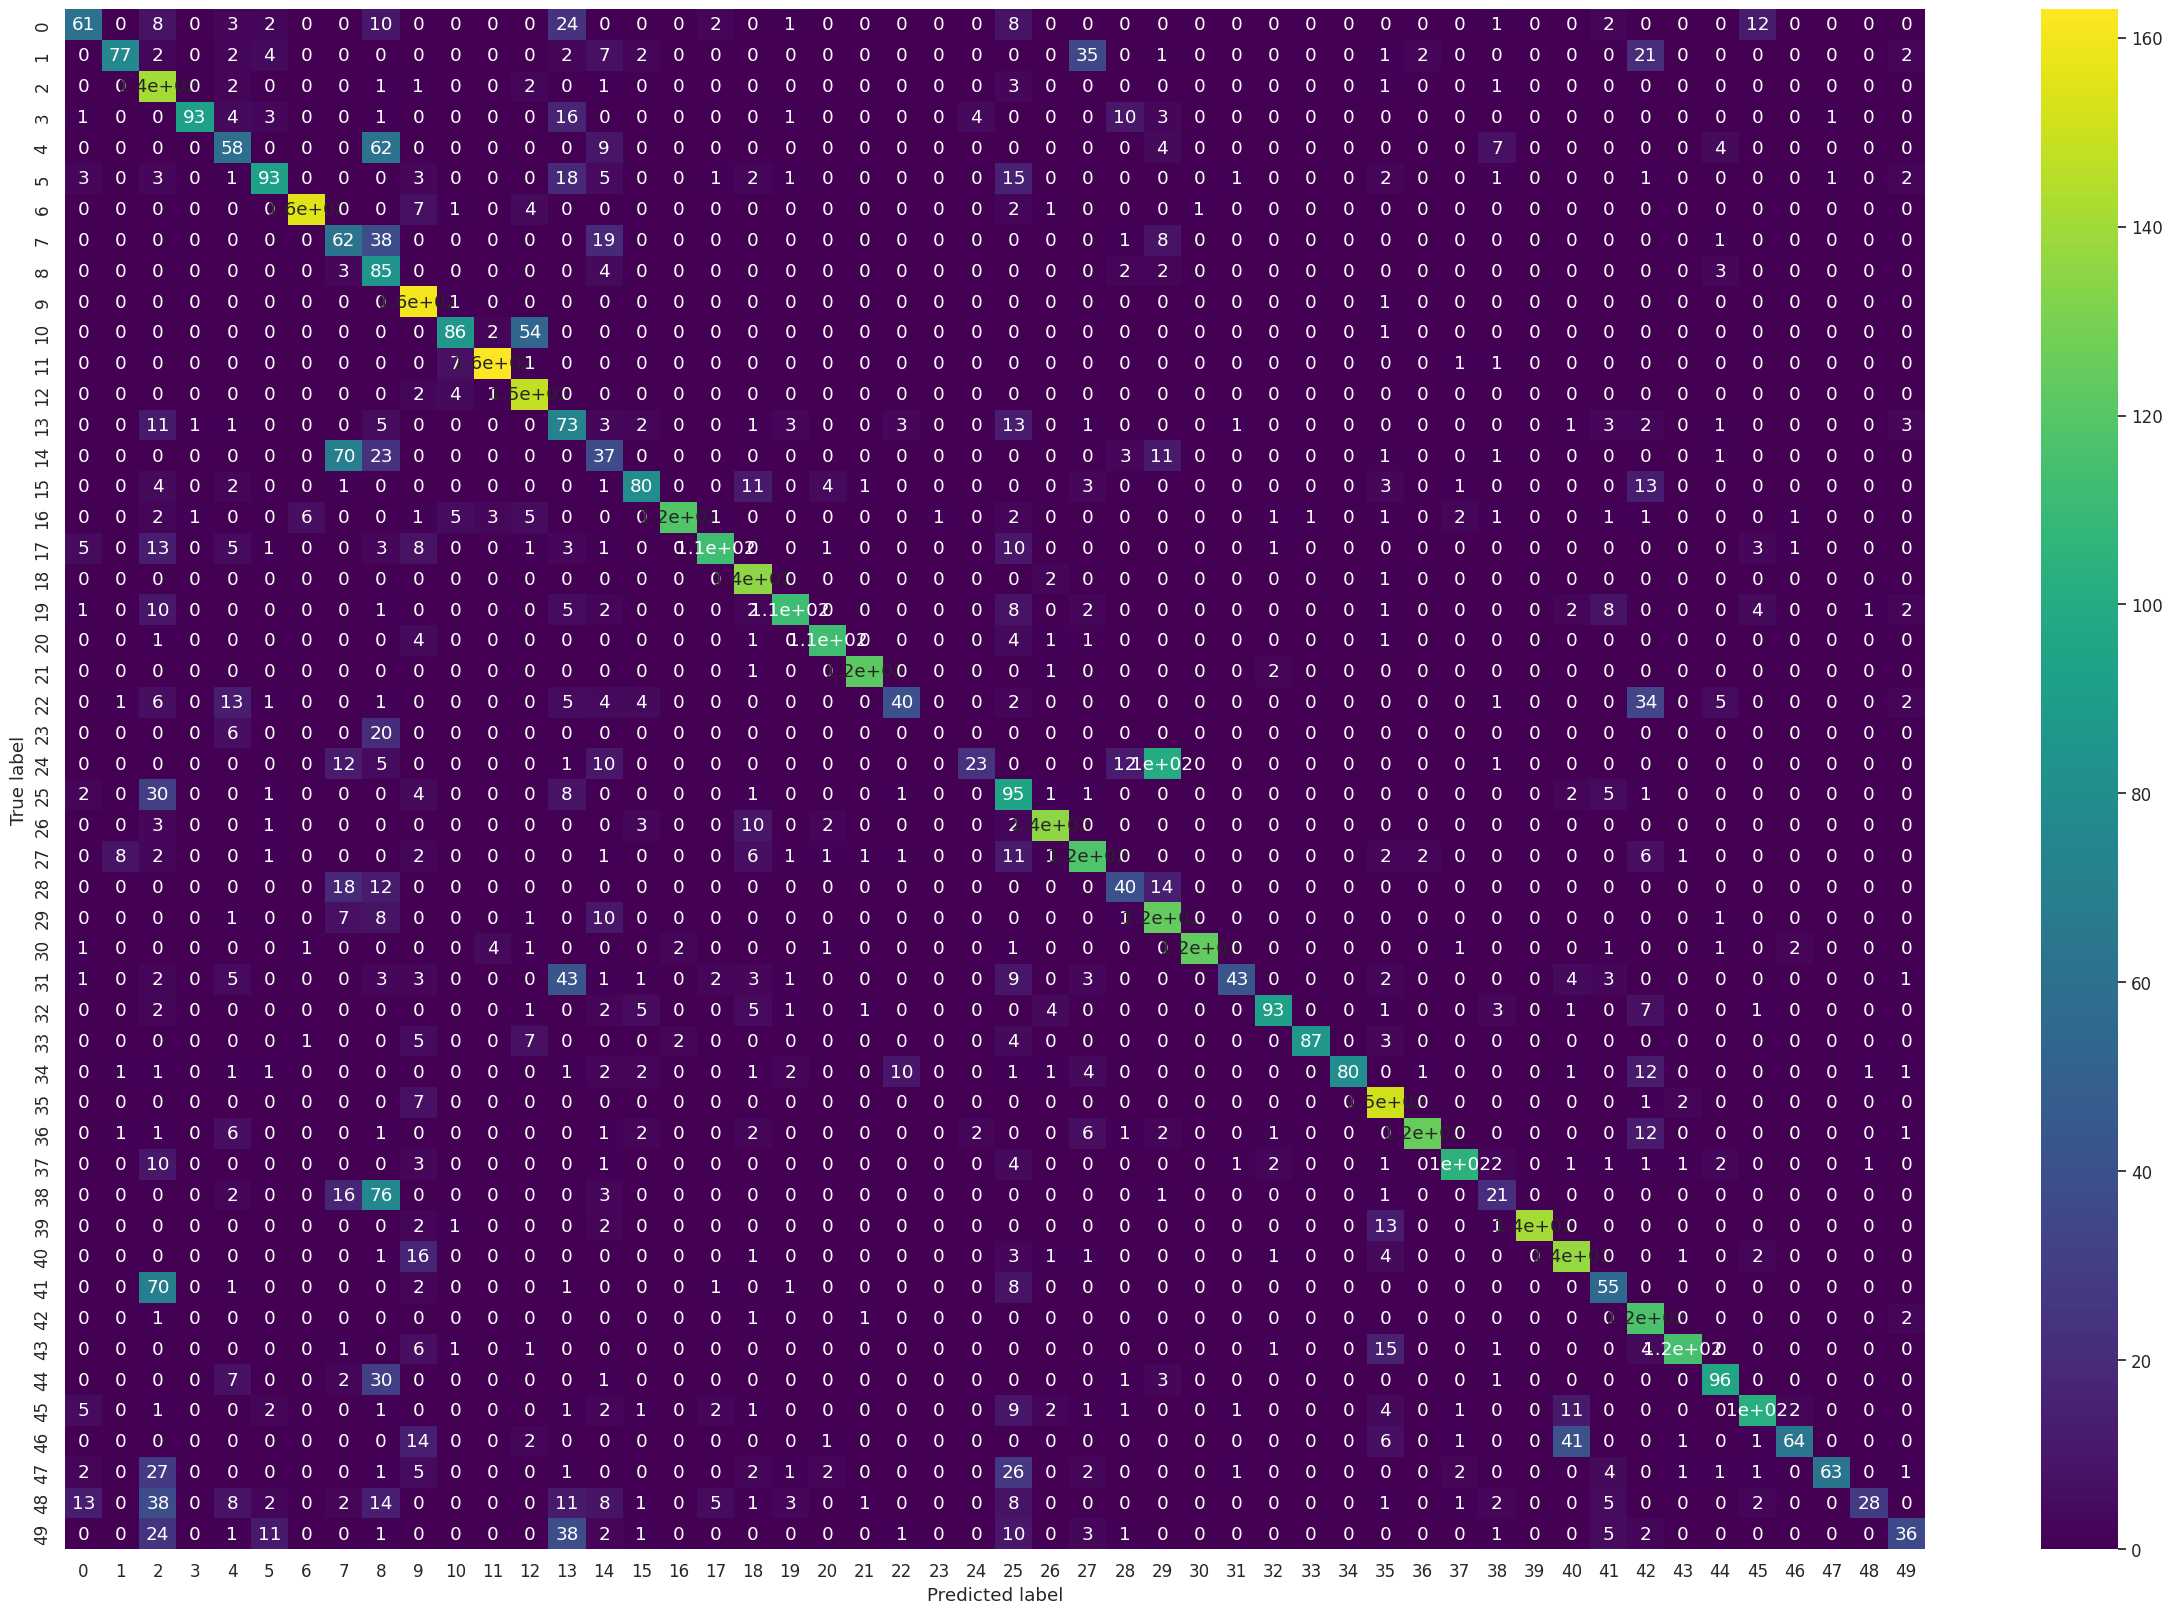

In [ ]:
y_true,y_pred=labels_confusion_matrix()
print_confusion_matrix(y_true,y_pred)

##precision/f1/recall

In [ ]:
from sklearn.metrics import accuracy_score, average_precision_score,precision_score,f1_score,recall_score
print('------Weighted------')
print('Weighted precision', precision_score(y_true, y_pred, average='weighted'))
print('Weighted recall', recall_score(y_true, y_pred, average='weighted'))
print('Weighted f1-score', f1_score(y_true, y_pred, average='weighted'))
print('------Macro------')
print('Macro precision', precision_score(y_true, y_pred, average='macro'))
print('Macro recall', recall_score(y_true, y_pred, average='macro'))
print('Macro f1-score', f1_score(y_true, y_pred, average='macro'))
print('------Micro------')
print('Micro precision', precision_score(y_true, y_pred, average='micro'))
print('Micro recall', recall_score(y_true, y_pred, average='micro'))
print('Micro f1-score', f1_score(y_true, y_pred, average='micro'))

------Weighted------
Weighted precision 0.7437791554152423
Weighted recall 0.6630031401655724
Weighted f1-score 0.6647806470108812
------Macro------
Macro precision 0.7247445710661021
Macro recall 0.6463372171265739
Macro f1-score 0.6468818505560598
------Micro------
Micro precision 0.6630031401655724
Micro recall 0.6630031401655724
Micro f1-score 0.6630031401655724
